In [3]:
import numpy as np
import pandas as pd

In [4]:
def read_eurostat_file(fn):
  raw = pd.read_csv(fn,sep="\t",na_values=[': ',': z',': c'])
  info = \
    raw[raw.columns[0]].str.split(pat=",",expand=True) \
      .set_axis(raw.columns[0].split(","), axis=1) \
      .rename(columns={"geo\\time":"geo"})
  filtered = raw.drop([raw.columns[0]], axis=1)
  return info.join(filtered)

In [69]:
avia_file = "C:/Tomas/Public/tpetricek/histogram/traffic/raw/avia_paoc.tsv"
rail_file = "C:/Tomas/Public/tpetricek/histogram/traffic/raw/rail_pa_total.tsv"
avia = read_eurostat_file(avia_file)
rail = read_eurostat_file(rail_file)

avia_ps = \
  avia.loc[(avia["tra_meas"] == "CAF_PAS") & (avia["schedule"] == "TOT") & \
    (avia["tra_cov"] == "TOTAL") & (avia["geo"] != "EU27") & (avia["geo"] != "EU28")]  \
    .set_index("geo")

rail_ps = \
  rail.loc[(rail["unit"] == "THS_PAS") & (rail["geo"] != "EU27") &(rail["geo"] != "EU28")] \
    .set_index("geo")


In [83]:
rp17 = rail_ps["2017 "]
ap17 = avia_ps["2017Q1 "] + avia_ps["2017Q2 "] + avia_ps["2017Q3 "] + avia_ps["2017Q4 "]

aligned = pd.DataFrame(data={"rail":rp17, "avia":ap17}).dropna(axis='index')
aligned['geo'] = aligned.index
large = aligned.loc[aligned["rail"] > 1000]


<AxesSubplot:xlabel='geo'>

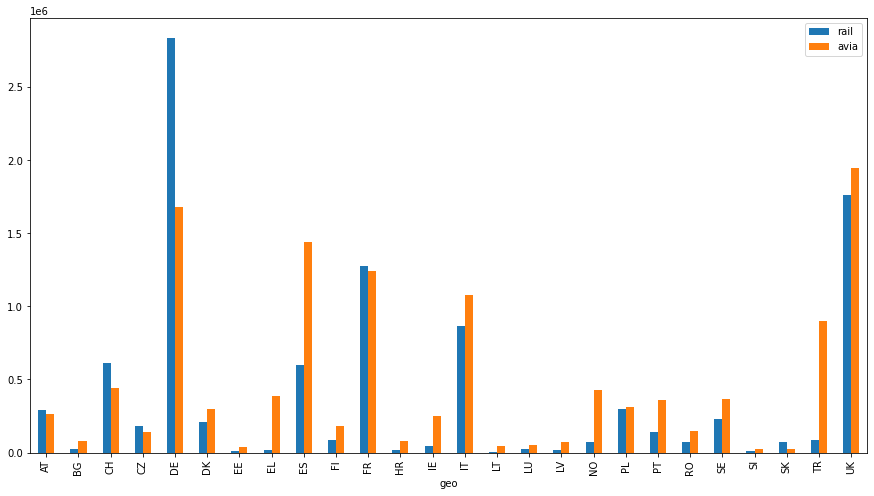

In [90]:
large.plot.bar(x='geo',figsize=(15,8))

<AxesSubplot:xlabel='geo'>

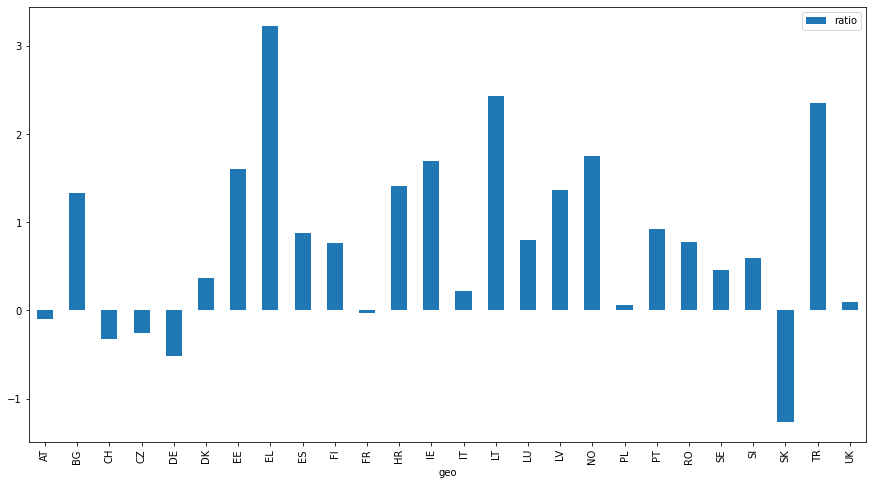

In [104]:
ratio = pd.DataFrame({"geo":large["geo"],"ratio":np.log(large["avia"] / large["rail"])})
ratio.plot.bar(x="geo",figsize=(15,8))